<a href="https://colab.research.google.com/github/Tsatthienmach/AiSummerCode/blob/master/week5/GA_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n = 10
m = 100
n_generations = 400

In [0]:
# Function that needs to be optimized
def sphere_function(x):
    return np.sum(x**2 , axis = 1)

In [0]:
# find non-zero fitness for selection
def compute_fitness(pred):
    return 1 / (pred + 1)

In [0]:
# nature selection wrt pop's fitness
def select(pop , fitness):
    #binary selection
    idx = np.random.choice(np.arange(m) , size = m , replace= True , p = fitness/fitness.sum())
    # print(fitness.sum() ,idx , fitness  ,sep = '\t', end = '\n\n' )
    return pop[idx]

In [0]:
# mating process (gens crossover)
def crossover( s1 , s2 , cr_rate = 0.9):
    cr_prob = np.random.rand((n))
    cr_mask = cr_prob < cr_rate
    # save s1
    buffer = s1.copy()
    # mating and produce one child
    s1[cr_mask] = s2[cr_mask]
    s2[cr_mask ] = buffer[cr_mask]
    return (s1,s2)

In [0]:
# mutate
def mutate(child , boud = 100 , mt_rate  = 0.05):
    mt_vector = (np.random.random(size = n) - 0.5) * boud
    # print(mt_vector)
    mt_prob = np.random.rand((n))
    mt_mask = mt_prob < mt_rate
    child[mt_mask] = mt_vector[mt_mask]
    return child

In [0]:
boud = 100
pop = (np.random.random(size = (m,n)) - 0.5) * boud
# to print losses
losses = []


In [0]:
# initialize the population
boud = 100
pop = (np.random.random(size = (m,n)) - 0.5) * boud
# to print losses
losses = []

# evolution 
for g in range( n_generations):
    # compute function value
    cost_values = sphere_function(pop)

    # compute_fitness
    fitness = compute_fitness(cost_values)
    if g%1 == 0 :
        losses.append(np.min(cost_values))
    
    pop = select(pop , fitness)

    parent_pop = pop.copy()

    for i in range(m//2 -2):
        k1 = np.random.randint(0,m, size = 1)
        k2 = np.random.randint(0,m , size = 1)
        s1 = parent_pop[k1].copy()[0]
        s2 = parent_pop[k2].copy()[0]
      
        s1 , s2 = crossover(s1 , s2)
        s1 = mutate(s1)
        s2 = mutate(s2)

        # parent is replaces by its child
        pop[i*2][:] = s1
        pop[i*2+1][:] = s2
        # if g == 0 and i == 0 :
        #     print(pop[i*2][:])
        #     print(pop[i*2])
    
    # elitism
    two_best = fitness.argsort()[-2:]
    pop[m-2][:] = parent_pop[two_best[0]].copy()[0]
    pop[m-1][:] = parent_pop[two_best[1]].copy()[0]


0.024687963536660557
[0.04968698 0.04968698 0.04968698 0.04968698 0.04968698 0.04968698
 0.04968698 0.04968698 0.04968698 0.04968698]


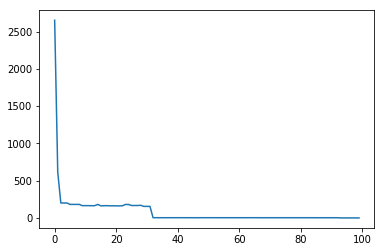

In [33]:
print(losses[99])
print(pop[99])
plt.plot(losses[:100])
plt.show()